In [1]:
# setup some librairies and display options
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# be careful we will only print the first 4 digits and round small numbers in arrays
np.set_printoptions(suppress=True, precision=4)

# libraries to make things interactive
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Markdown

import scipy
from display_helpers import bmatrix, pmatrix
import display_helpers

This notebook aims to provide a visual example of the effect of doing rigid-body transformations from the body or spatial frame (i.e. what happens when we multiply on the left or on the right of an homogeneous transform).



## Body and Spatial transformations

The code below displays the effect of a transformation in body coordinates. If an object has pose $T_{SB}$ and we want to apply a transformation $T_{C}$ on it, for example a rotation. There are two manners to apply this transformation: 
1. either this transformation is done with respect to the spatial frame and then the new pose of the object is $T_{SB, new} = T_C \cdot T_{SB}$
2. or this transformation is done with respect to the body frame (i.e. the frame of the object) and then the new pose of the object is $T_{SB, new} = T_{SB} \cdot T_C$


Below we created a simple example where we rotate a cube by a rotation of $\alpha$ along the z-axis. We can select to either use this rotation either with respect to the z-axis of the spatial frame or the z-axis of the body frame.

In the code below, you can change `T_init` as the initial pose of the cube to see how these changes affect the behavior of the movement.


Note: if your browser does not update the matrices in real time below - change every occurence of `continuous_update = True` in the code below into `continuous_update = False`. This should enable the browser to update the matrices only after you release the slider.

### Illustration of a rotation around z with respect to the body frame or the spatial frame

<IPython.core.display.Javascript object>


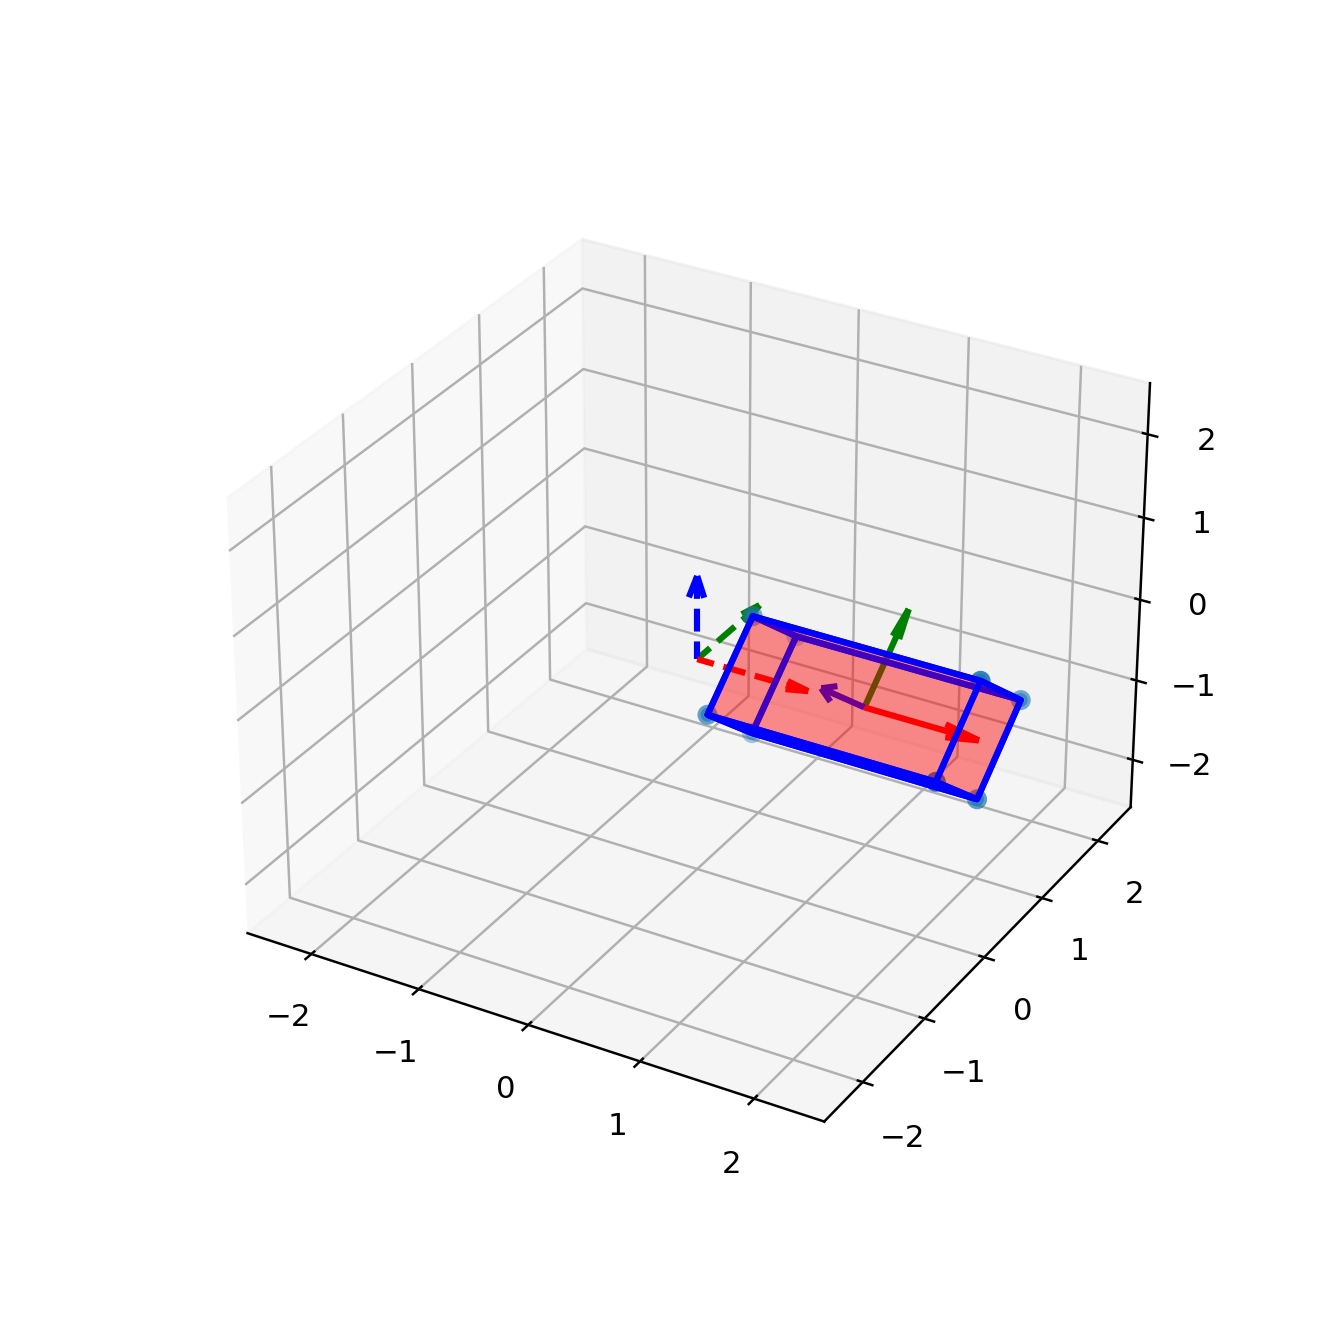

### Use the slider to change the rotations around each axis

interactive(children=(FloatSlider(value=0.0, description='alpha', max=3.14, min=-3.14, step=0.01), RadioButton…

<function __main__.<lambda>(alpha, body)>

In [2]:
def rotate_cube(ax, T_init, alpha, body):
    """
        this plots the transformation of a cube from T_init pose when a rotation of alpha around z is added
        if body=True, the rotation is done around the body z axis: T_final = T_init * T_rotation
        if body = False, the rotation is done around the spatial frame z axis: T_final = T_rotation * T_init
    """
    # vertices of a cube
    vertices = np.array([[-1., -0.5, -0.5], [1, -0.5, -0.5], [1, 0.5, -0.5],  [-1, 0.5, -0.5], 
                         [-1., -0.5, 0.5], [1, -0.5, 0.5], [1, 0.5, 0.5],  [-1, 0.5, 0.5]])
    
    # a pure rotation around z axis of alpha 
    T_rot = np.eye(4)
    T_rot[0:2, 0:2] = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
    
    output = 'Initial pose of the body $T_{B} = ' + bmatrix(T_init) + '$'
    display(Markdown(output))
    output = 'Rotation $T_{rot} = ' + bmatrix(T_rot) + '$'
    display(Markdown(output))
    
    # check whether we are doing a body or a spatial transformation
    if body:
        T = T_init @ T_rot
        display(Markdown('We perform the rotation with respect to the body z axis'))
        output = 'Final transform $T = T_{B} \cdot T_{rot}  = ' + bmatrix(T_init) + '\cdot' + bmatrix(T_rot) + '=' + bmatrix(T) + '$'
    else:
        T = T_rot @ T_init
        display(Markdown('We perform the rotation with respect to the spatial frame z axis'))
        output = 'Final transform (body frame) $T = T_{rot} \cdot T_{B}  = ' + bmatrix(T_rot) + '\cdot' + bmatrix(T_init) + '=' + bmatrix(T) + '$'
            
    display_helpers.update_plot_cube3D(ax, vertices, T, plot_scale=2.5)        
    display(Markdown(output))
    

## the initial position of the cube (feel free to change it)
## example with just a translated position
# T_init = np.eye(4,4)
# T_init[0:3,3] = np.array([1.5,0,0])

## example with z and y axes rotated by pi/4 around x (uncomment below to try)
T_init = np.eye(4,4)
T_init[1:3,1:3] = np.array([[np.cos(np.pi/4),-np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4.)]])
T_init[0:3,3] = np.array([1.5,0,0])


display(Markdown('### Illustration of a rotation around z with respect to the body frame or the spatial frame'))
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
display(Markdown('### Use the slider to change the rotations around each axis'))

# build the widgets and interactive figure
interact(lambda alpha, body: rotate_cube(ax, T_init, alpha, body), 
         alpha = widgets.FloatSlider(min=-3.14,max=3.14,step=0.01, value=0., continuous_update=True),
         body = widgets.RadioButtons(options=[('Body rotation', True), ('Spatial frame rotation', False)], disabled=False, continuous_update=False)
        )

